# Guided Project: Predicting Employee Productivity Using Tree Models

In this project we will be working with the dataset [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees). We will be exploring how to predict productivity of workers in the garment industry. In order to do this we will be utilizing decision trees and techniques around this.

In [1]:
import pandas as pd

df = pd.read_csv("garments_worker_productivity.csv")

df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Dataset Exploration

A description of the columns are as follows:

| Column | Description |
|--------|-------------|
|`date`  | date in MM-DD-YYYY |
|`quarter`| a portion of the month — month was divided into four quarters|
|`department`| associated department with the instance|
|`day`| day of the week|
|`team`| associated team number with the instance|
|`targeted_productivity`| targeted productivity set by the authority for each team for each day|
|`smv`| standard minute value — the allocated time for a task|
|`wip`| work in progress — includes the number of unfinished items for products|
|`over_time`| represents the amount of overtime by each team in minutes|
|`incentive`| represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action|
|`idle_time`| the duration of time when the production was interrupted due to several reasons|
|`idle_men`| the number of workers who were idle due to production interruption
|`no_of_style_change`| number of changes in the style of a particular product|
|`no_of_workers`| number of workers on each team|
|`actual_productivity`| the actual % of productivity that was delivered by the workers — it ranges from 0 to 1|

In [2]:
df.shape

(1197, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Initial observations:
- There are 1197 observations
- Only the `wip` column contains `null` values (as `NaN`), these values could be zero, this needs investigation
- `team` is represented by an integer but is categorical
- `no_of_workers` ranges from 2 to 89 which is quite a big range
- The target column `actual_productivity` has a max value greater than 1, whilst the column is described as having values betwen 0 and 1 - this will require further investigation
- `targeted_productivity` is set at intervals of 5% or 0.05. The mean and median are fairly close to those of the mean and median of `actual_productivity`. This could be a good predictor for `actual_productivity`, is there a correlation?

### Categorical column observations

In [5]:
import numpy as np
df.describe(exclude=[np.number]) 

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [6]:
print(f"First date: {df['date'].min()} \nLast date: {df['date'].max()}")

First date: 1/1/2015 
Last date: 3/9/2015


In [7]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [8]:
df["date"][df["quarter"]=="Quarter5"].value_counts()

1/31/2015    24
1/29/2015    20
Name: date, dtype: int64

In [9]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [10]:
df["day"].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

More observations:
- Our data covers a short 2-month time period, this won't allow us to observe seasonal variation in productivity, so this column is probably not usefull for building a model.
- Here quarters represent parts of a month, not a year. Quarter5 only represents 2 dates (a fifth week in the month) so these could be combined with Quarter4
- There are actually only 2 departments: `sewing` and `finishing`, this will need cleaning later
- Friday is the ony day nobody works - possibly since this data is from Bangladesh, a predominantly Islamic country, where Friday is a holy day similar to Sunday in Western/Christian societies.

### Further numerical column observations

In [11]:
df["idle_time"].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [12]:
df["idle_men"].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

In [13]:
print(f'Observations where both idle_hours and idle_men are zero: {len(df[(df["idle_men"]==0) & (df["idle_time"]==0)])}')

Observations where both idle_hours and idle_men are zero: 1179


For these two columns most of our values are zero - (everyone is working and there is no idle time) so we can drop these columns later, they add little useful information to the model.

In [14]:
df["no_of_style_change"].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

The majority of values is zero, again this column adds little value to our future model.

In [15]:
print(f'Number of observations with an incentive of 0: {len(df[df["incentive"] == 0])}')
print(f'Number of observations with an incentive not 0: {len(df[df["incentive"] > 0])}')
print(f'Number of observations with an incentive greater than 50: {len(df[df["incentive"] > 50])}')
print(f'Number of observations with an incentive greater than 100: {len(df[df["incentive"] > 100])}')

Number of observations with an incentive of 0: 604
Number of observations with an incentive not 0: 593
Number of observations with an incentive greater than 50: 231
Number of observations with an incentive greater than 100: 34


In [16]:
df[df["incentive"]>100]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
543,2/1/2015,Quarter1,sweing,Sunday,2,0.80,22.52,1396.0,6900,113,0.0,0,0,57.5,1.000671
544,2/1/2015,Quarter1,sweing,Sunday,1,0.80,22.94,1582.0,3060,113,0.0,0,0,58.5,1.000402
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
581,2/3/2015,Quarter1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.000019


Looking at the observations with high incentives we can see a difference between the actual productivity, particularly between departments (sewing appears to achieve higher productivity ratings than the finishing department)

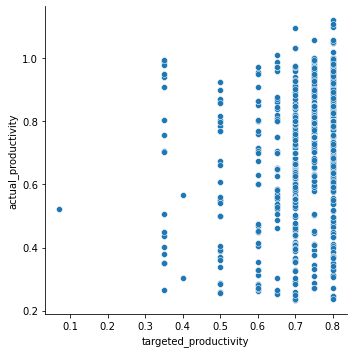

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(data=df, x="targeted_productivity", y="actual_productivity")
plt.show()

In [18]:
df["actual_productivity"][df["targeted_productivity"]==0.8].describe()

count    540.000000
mean       0.800119
std        0.145803
min        0.238042
25%        0.799963
50%        0.800536
75%        0.899222
max        1.120437
Name: actual_productivity, dtype: float64

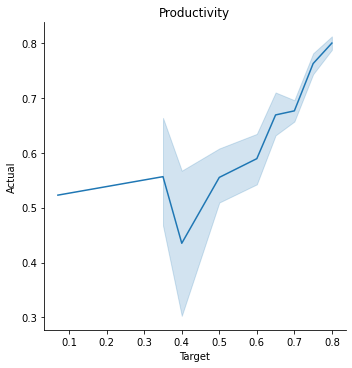

In [19]:
g = sns.relplot(data=df, x="targeted_productivity", y="actual_productivity", kind="line")
g.set_axis_labels("Target", "Actual")
plt.title("Productivity")
plt.show()

We have already observed that there are actual_productivity values greater than 1, however we can see that on average the actual and target values are fairly similar over 0.5.

<AxesSubplot:ylabel='over_time'>

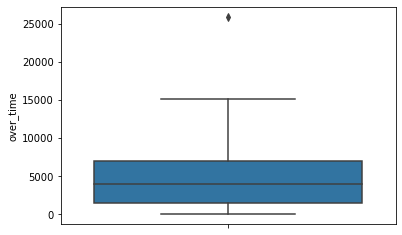

In [20]:
sns.boxplot(data=df, y="over_time")

In [21]:
df["over_time"].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

In [22]:
IQR = 6960-1440
upper_lim = 6960+1.5*IQR
outlier = df[df["over_time"]>upper_lim]
outlier

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951


In [23]:
outlier["over_time"]/outlier["no_of_workers"]/60

146    8.0
dtype: float64

There is only one outlier here, which if you divide by the workers you find that each worker did an extra 8 hours each, this could have been a double shift. This also happened on a Thursday, which appears to be followed by a non-working day (Friday).

## Data cleaning

We will remove the following columns:
- `date`
- `idle_time`
- `idle_men`
- `no_of_style_change`
- `wip`  - since we can't categorically say whether the null values should be 0 or not

We also need to:
- clean the values in the `department` and `quarter` columns
- convert `no_of_workers` to integer data type
- round `actual_productivity` values to 2 decimals, consistent with the `targeted_productivity` column
- create a new boolean categorical column for productivity (did actual meet target)

In [24]:
df_clean = df.copy()
df_clean = df_clean.drop(["date", "idle_time", "idle_men", "no_of_style_change", "wip"], axis=1)
df_clean.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382


In [25]:
print(df_clean["quarter"].value_counts().sort_index())
df_clean.loc[df_clean["quarter"]=="Quarter5", "quarter"]="Quarter4"
df_clean["quarter"].value_counts().sort_index()

Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    248
Quarter5     44
Name: quarter, dtype: int64


Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    292
Name: quarter, dtype: int64

In [26]:
df_clean.loc[df_clean["department"]=="finishing ", "department"]="finishing"
df_clean["department"].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [27]:
df_clean["no_of_workers"] = df_clean["no_of_workers"].astype(int)
df_clean["actual_productivity"] = round(df_clean["actual_productivity"],2)

In [28]:
df_clean["productive"] = df_clean["actual_productivity"] >= df_clean["targeted_productivity"]

In [29]:
df_clean = df_clean[["quarter","day", "department", "team", "smv", "over_time", "incentive", "no_of_workers", "targeted_productivity", "actual_productivity", "productive" ]]

In [30]:
df_clean["productive"] = df_clean["productive"].astype(str)

In [31]:
df_clean.head()

,quarter,day,department,team,smv,over_time,incentive,no_of_workers,targeted_productivity,actual_productivity,productive
0,Quarter1,Thursday,sweing,8,26.16,7080,98,59,0.80,0.94,True
1,Quarter1,Thursday,finishing,1,3.94,960,0,8,0.75,0.89,True
2,Quarter1,Thursday,sweing,11,11.41,3660,50,30,0.80,0.80,True
3,Quarter1,Thursday,sweing,12,11.41,3660,50,30,0.80,0.80,True
4,Quarter1,Thursday,sweing,6,25.90,1920,50,56,0.80,0.80,True


### Converting categorical data to binary data

I will use the function `pd.get_dummies` to make the following changes ensuring all data is numerical:
- `quarter` to 3 new binary columns dropping the first (since it is implicit that this is the option if all others are zero
- `department` to 1 binary column (there are only two possible departments)
- `team` to 11 new binary columns, dropping the first column
- `day` to 6 new binary columns, I have chosen to keep all columns, since it Friday is already not present.


In [32]:
df_cleaned = df_clean.copy()
df_cleaned = pd.get_dummies(data=df_cleaned, columns=["quarter"], prefix="",prefix_sep="", drop_first=True)
df_cleaned = pd.get_dummies(data=df_cleaned, columns=["day"])
df_cleaned = pd.get_dummies(data=df_cleaned, columns=["department"], prefix="dpt", drop_first=True)
df_cleaned = pd.get_dummies(data=df_cleaned, columns=["team"], drop_first=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   smv                    1197 non-null   float64
 1   over_time              1197 non-null   int64  
 2   incentive              1197 non-null   int64  
 3   no_of_workers          1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   actual_productivity    1197 non-null   float64
 6   productive             1197 non-null   object 
 7   Quarter2               1197 non-null   uint8  
 8   Quarter3               1197 non-null   uint8  
 9   Quarter4               1197 non-null   uint8  
 10  day_Monday             1197 non-null   uint8  
 11  day_Saturday           1197 non-null   uint8  
 12  day_Sunday             1197 non-null   uint8  
 13  day_Thursday           1197 non-null   uint8  
 14  day_Tuesday            1197 non-null   uint8  
 15  day_

## Building the Tree

The model achieves an accuracy score of 85.4%



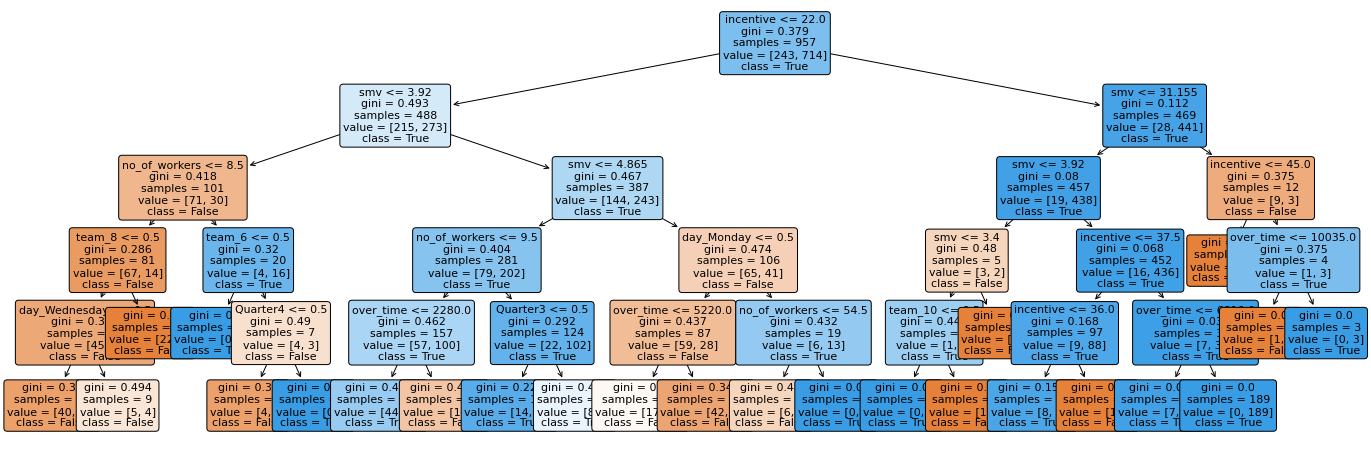

              precision    recall  f1-score   support

       False       0.73      0.64      0.68        59
        True       0.89      0.92      0.91       181

    accuracy                           0.85       240
   macro avg       0.81      0.78      0.79       240
weighted avg       0.85      0.85      0.85       240



In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df_cleaned.drop(["productive", "actual_productivity", "targeted_productivity"], axis=1)
y = df_cleaned["productive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=24)

class_tree_gini = DecisionTreeClassifier(criterion="gini", 
                                         max_depth=5, 
                                         random_state=24)
class_tree_gini.fit(X_train, y_train)

y_pred = class_tree_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"The model achieves an accuracy score of {accuracy*100:.1f}%\n")

plt.figure(figsize=[24.0, 8.0])

_ = plot_tree(class_tree_gini,
              feature_names=X.columns,
              class_names=class_tree_gini.classes_ , 
              filled=True ,
              proportion=False , precision=3 , 
              rounded=True ,
              fontsize=11 )
plt.show()


print(classification_report(y_test, y_pred))

The model achieves an accuracy score of 86.2%

              precision    recall  f1-score   support

       False       0.75      0.66      0.70        59
        True       0.89      0.93      0.91       181

    accuracy                           0.86       240
   macro avg       0.82      0.79      0.81       240
weighted avg       0.86      0.86      0.86       240



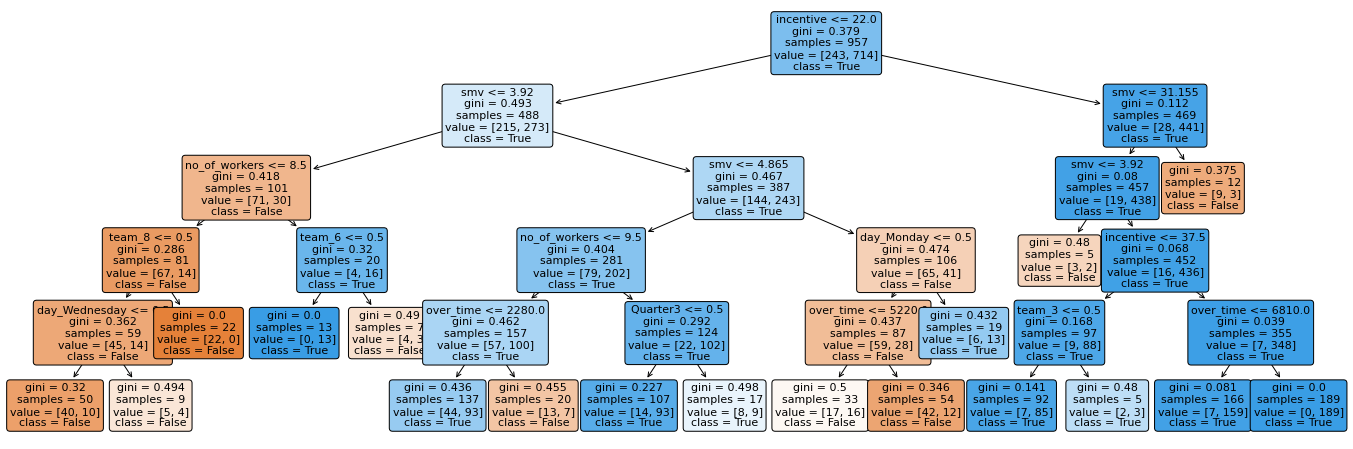

In [34]:
class_tree_gini_2 = DecisionTreeClassifier(criterion="gini", 
                                            max_depth=5, 
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            random_state=24)
class_tree_gini_2.fit(X_train, y_train)

y_pred_2 = class_tree_gini_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print(f"The model achieves an accuracy score of {accuracy_2*100:.1f}%\n")
print(classification_report(y_test, y_pred_2))

plt.figure(figsize=[24.0, 8.0])

_ = plot_tree(class_tree_gini_2,
              feature_names=X.columns,
              class_names=class_tree_gini_2.classes_ , 
              filled=True ,
              proportion=False , precision=3 , 
              rounded=True ,
              fontsize=11 )
plt.show()

By adjusting the `min_samples_split` and `min_samples_leaf` variables we have increased the accuracy score by 0.8%, the improvement mainly seems to be for the `False` values.

## Explaining the Tree

## Using Random Forest


In [37]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=20,
                                max_depth=3,
                                oob_score=True,
                                random_state=24,
                                n_jobs=-1)

forest.fit(X, y)

accuracy = forest.oob_score_

print(f'accuracy: {accuracy*100:.2f}%')

accuracy: 79.70%


In [36]:
from sklearn.model_selection import GridSearchCV

forest2 = RandomForestClassifier(random_state=24, oob_score=True)

parameters = {
    "max_depth": list(range(3,10)),
    "n_estimators": [20, 40, 60, 80, 100],
    "min_samples_split":[10, 20, 25, 30],
    "min_samples_leaf": [1, 5, 10, 15, 20]
}

grid_random_class = GridSearchCV(forest2,
                                param_grid=parameters,
                                n_jobs=-1)
grid_random_class.fit(X,y)

grid_random_class_params = grid_random_class.best_params_
grid_random_class_score = grid_random_class.best_score_

print(f'Best score achieved: {grid_random_class_score*100:.2f}%')
print('Best parameters')
print('-----------')
print(f'max_depth: {grid_random_class_params["max_depth"]}')
print(f'min_samples_leaf: {grid_random_class_params["min_samples_leaf"]}')
print(f'min_samples_split: {grid_random_class_params["min_samples_split"]}')
print(f'n_estimators: {grid_random_class_params["n_estimators"]}')

Best score achieved: 79.86%
Best parameters
-----------
max_depth: 4
min_samples_leaf: 15
min_samples_split: 10
n_estimators: 80


Using random forest inclusing tuning our hyper parameters using a grid search has not found a more accurate model than the one we created from a single decision tree.